# NYC 311 Complaints

## An exploratory data analysis based on NYC311 dataset
NYC 311 is a gorverment-based callcenter service for non-emergency issues in New York city such as:
* Abandoned vehicles
* Loud noises
* Graffiti
* etc.

The objective is to gain insights and asking questions regarding:
* What are the issues? 
* Which issues have occured more than the others?
* What are the trend of the complaints?
* Which locations have to be looked at?
* etc.

At the end will be a summary of what are the problems that need to be closely looked into and what are the possible solutions to _minimize the problems and increase the efficiency and effectiveness_ of NYC 311 operations.

### Import Libraries and Read CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from matplotlib import style
style.use('bmh')

In [2]:
df = pd.read_csv('dataset/NYC311data.csv', low_memory=False) #Problem with dtype, thus specifying low_memory=False

### Dataset overview

There are columns that have almost all NaN values.
Fortunately, by looking at those we possibly don't need them.

In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


There 300698 rows and 53 columns.

In [4]:
df.shape

(364558, 53)

Most of the columns here are not relevent to this analysis.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

The 'Incident Zip' has the lowest value of 83 which is unlikely, but luckily we will not be using the column. It could be due to entry errors.

In [6]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


### Data cleaning with selected columns

These are the columns that we will be looking into.

In [7]:
df = df.filter(['Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 
        'Descriptor', 'Location Type', 'Street Name', 'City'])

Note: *We will not remove any duplicates because we will be calculating and look into the frequency of each.*

In [8]:
df.describe()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Street Name,City
count,364558,362177,364558,364558,364558,358057,364425,312859,361561
unique,362018,339837,1,3,24,45,18,7693,53
top,02/11/2015 10:56:36 PM,09/10/2015 07:12:49 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,BROADWAY,BROOKLYN
freq,3,3,364558,364548,100881,75888,301372,4122,118862


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Created Date    364558 non-null  object
 1   Closed Date     362177 non-null  object
 2   Agency          364558 non-null  object
 3   Agency Name     364558 non-null  object
 4   Complaint Type  364558 non-null  object
 5   Descriptor      358057 non-null  object
 6   Location Type   364425 non-null  object
 7   Street Name     312859 non-null  object
 8   City            361561 non-null  object
dtypes: object(9)
memory usage: 25.0+ MB


Check for null values.

In [10]:
df.isna().sum()

Created Date          0
Closed Date        2381
Agency                0
Agency Name           0
Complaint Type        0
Descriptor         6501
Location Type       133
Street Name       51699
City               2997
dtype: int64

Drop null values and copy to a new dataframe.

In [11]:
df1 = df.dropna().copy()

Validate the null values.

In [12]:
df1.isnull().sum()

Created Date      0
Closed Date       0
Agency            0
Agency Name       0
Complaint Type    0
Descriptor        0
Location Type     0
Street Name       0
City              0
dtype: int64

Create new columns for day, month, and weekdays out of the date. 

In [13]:
df1['Created Date'] = pd.to_datetime(df1['Created Date'])
df1['Created Month'] = pd.DatetimeIndex(df1['Created Date']).month
df1['Created Day'] = pd.DatetimeIndex(df1['Created Date']).day
df1['Created Day of Week'] = pd.DatetimeIndex(df1['Created Date']).dayofweek

In [14]:
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
        3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Friday'}
df1['Created Day of Week'] = df1['Created Day of Week'].map(days)
df1.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Street Name,City,Created Month,Created Day,Created Day of Week
0,2015-12-31 23:59:45,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,VERMILYEA AVENUE,NEW YORK,12,31,Thursday
1,2015-12-31 23:59:44,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,23 AVENUE,ASTORIA,12,31,Thursday
2,2015-12-31 23:59:29,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,VALENTINE AVENUE,BRONX,12,31,Thursday
3,2015-12-31 23:57:46,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,BAISLEY AVENUE,BRONX,12,31,Thursday
4,2015-12-31 23:56:58,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,57 ROAD,ELMHURST,12,31,Thursday


### Trend of the complaints from March to December

Important note: _The agency might have a slow start regarding the data collection from January based on the graph._

We can see that the compaints rapidly increased from January and reach the highest in May. From then the complaints steadily decreased until December. In which it might suggests that the data collecting have some positive effect on preventing issues.


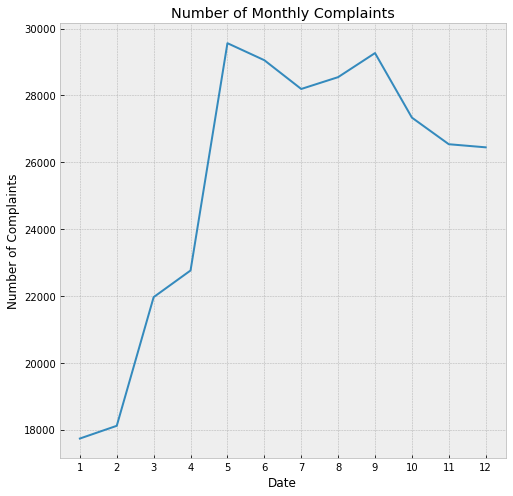

In [15]:
complaint_monthly = df1['Created Month'].value_counts().sort_values(ascending = False)

plt.figure(figsize=(8, 8))
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.title("Number of Monthly Complaints")
plt.xticks(np.arange(0, 32, 1.0))

sns.lineplot(x=complaint_monthly.index, y=complaint_monthly)

plt.show()

### Trend of daily complaints

The graph shows spikes that may suggest certain weekday having a lot of complaints.

We can can see a massive decreased after every 30th, which may suggests the inconsistency in collecting the data for every 31st because it is unlikely for such a massive decrease.

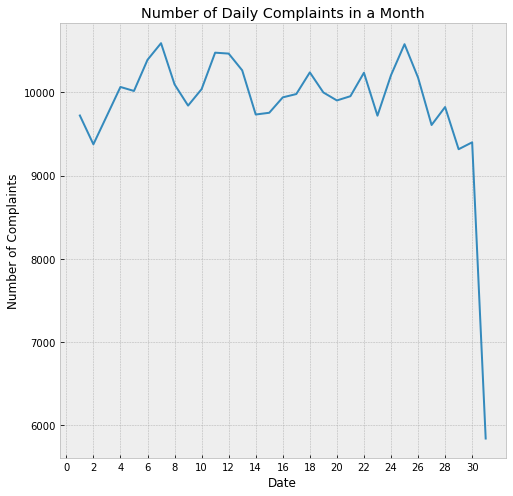

In [16]:
complaint_daily = df1['Created Day'].value_counts().sort_values(ascending = False)

plt.figure(figsize=(8, 8))
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.title("Number of Daily Complaints in a Month")
plt.xticks(np.arange(0, 32, 2.0))

sns.lineplot(x=complaint_daily.index, y=complaint_daily)

plt.show()

### Top weekdays complaints

As we can clearly see that Friday has complaints doubled of any other weekdays. This hints to certain activities that people would likely do on Friday.

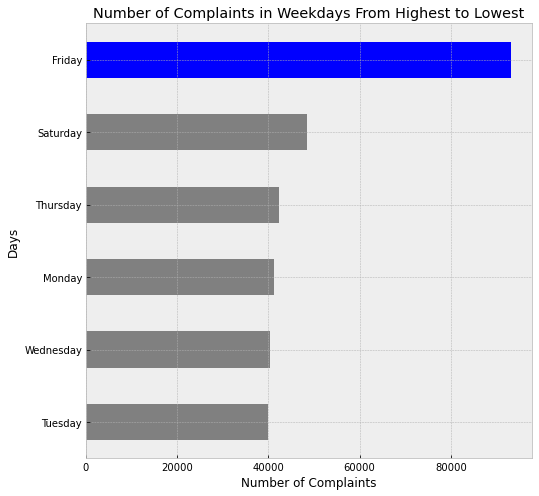

In [17]:
num_of_complaints = df1['Created Day of Week'].value_counts().sort_values(ascending = True)

num_of_complaints.plot.barh(figsize=(8, 8), color=['grey' , 'grey', 'grey', 'grey', 'grey', 'blue'])

plt.xlabel('Number of Complaints')
plt.ylabel('Days')
plt.title('Number of Complaints in Weekdays From Highest to Lowest')

plt.show()

### What are the most occurring complaints?

Blocked drively and illegal parking are first and second. This may be due to the lacking of parking spaces in certain areas of New York city.

Noise complaints are also common, it could definitely be related activities on Friday such as party, drinking, etc.

Interestingly there is also derelict vehicle in which could related to bigger problems state-wide or even nation-wide that influenced people to abandoned their vehicles.


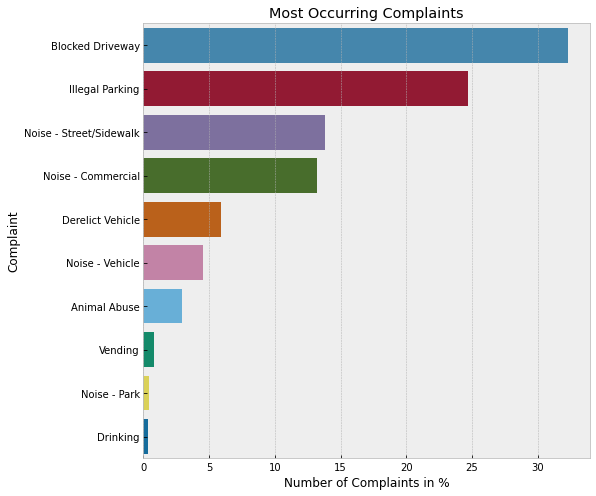

In [18]:
complaint_pct = df1['Complaint Type'].value_counts().iloc[:10] * 100 / df1['Complaint Type'].count()

plt.figure(figsize=(8, 8))
plt.title('Most Occurring Complaints')

ax = sns.barplot(x=complaint_pct, y=complaint_pct.index)
ax.set(xlabel='Number of Complaints in %', ylabel='Complaint')

plt.show()

### Which location has the most complaints?

Street or sidewalk beats any other locations due to the problems regarding vehicles and parking.

Surpringly for complaints regarding noise, store or commercial has the most compaints. This may be due to loud advertising or the fact that most citizens go shopping on weekday like Friday.

While club, bar, restaurant, residential building, and house hinting at noises from loud music, loud talking, or even loud footsteps.

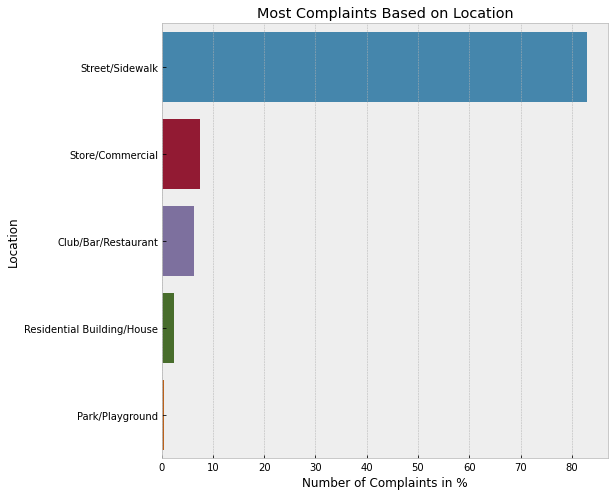

In [19]:
lo_type_complaint_pct = df1['Location Type'].value_counts().iloc[:5] * 100 / df1['Location Type'].count()

plt.figure(figsize=(8, 8))
plt.title('Most Complaints Based on Location')

ax = sns.barplot(x=lo_type_complaint_pct, y=lo_type_complaint_pct.index)
ax.set(xlabel='Number of Complaints in %', ylabel='Location')

plt.show()

### Which street has the most complaints?

Broadway, due to its being an entertainment street or district.

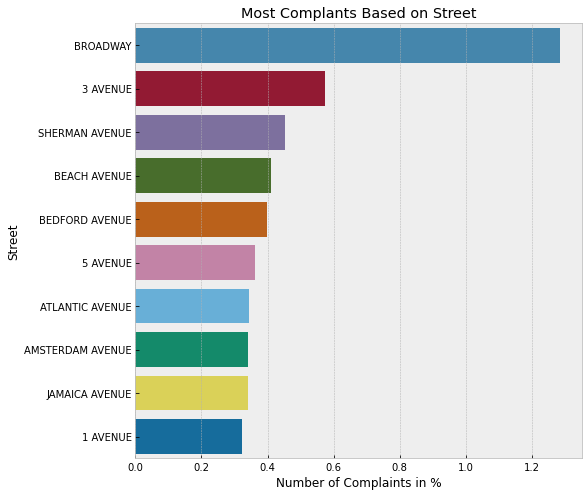

In [20]:
street_complaint_pct = df1['Street Name'].value_counts().iloc[:10] * 100 / df1['Street Name'].count()

plt.figure(figsize=(8, 8))
plt.title('Most Complants Based on Street')

ax = sns.barplot(x=street_complaint_pct, y=street_complaint_pct.index)
ax.set(xlabel='Number of Complaints in %', ylabel='Street')

plt.show()

### Which city or borough has the most complaints?

Brooklyn has the most complaints but that is likely due to its having the most population.

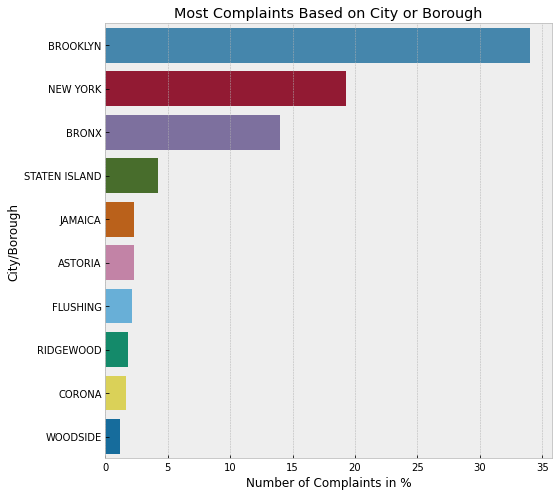

In [21]:
city_complaint_pct = df1['City'].value_counts().iloc[:10] * 100 / df1['City'].count()

plt.figure(figsize=(8, 8))
plt.title('Most Complaints Based on City or Borough')

ax = sns.barplot(x=city_complaint_pct, y=city_complaint_pct.index)
ax.set(xlabel='Number of Complaints in %', ylabel='City/Borough')

plt.show()

### Let's take a look at the most common words of the complaints

By looking at this we can say that Friday is the day that people went to drink and party with friends or colleagues after work hinted by the words, loud music, music party, party, loud, etc.

Second group of common words hinting at parking vehicles related complaints such as blocked sidewalk, overnight parking etc.

We can put these two pieces together and summarize that; on Friday people went out to drink and party, those that use cars park illegally because of limited space, and some are too drunk to drive.

In [22]:
from wordcloud import WordCloud
common_complaints = df1['Descriptor'].tolist()



In [23]:
wordcloud = WordCloud(stopwords=None,
                      background_color='white',
                      width=1200,
                      height=1000).generate(str(common_complaints))

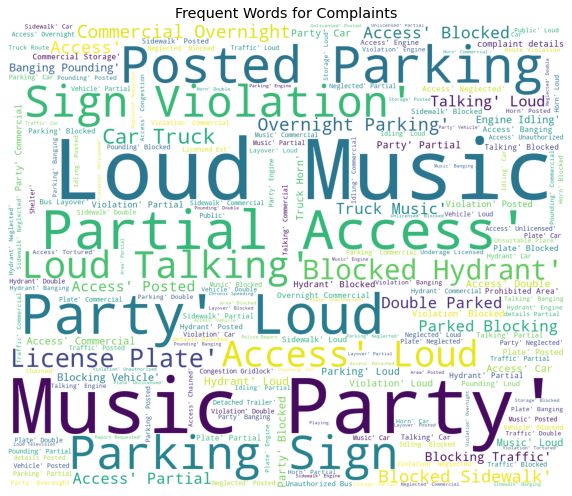

In [24]:
plt.figure( figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent Words for Complaints')
plt.axis('off')
plt.show()

## Summary

New York city has its massive population and the issue can be due to overpopulation. Thus, it will be difficult the change its infrastucture or street layout horizontally to accomodate certain needs such as parking space due to its limited space. By having a massive population, this can easily leads to pollution, especially noise pollution. There are possible solutions to reduce complaints, help certain people that are affected, accomodate the needs of its people, and increase NYC 311's efficiency and effectiveness in dealing the complaints because the number of complaints can also be due to ineffective operations.

## Possible ways to increase the efficiency and effectiveness in dealing with the complaints

By looking at the the information the suggested Friday having the most complaints, the agency could dynamically adjust the number of personnel accordingly:
* Having the most personnel on Friday and less on the other day. This can make the operation more efficient and effective while reducing waste and unwanted costs. For example, if the callcenter personnel are working part-time, it would be a waste to pay them on the day that doesn't have much complaints. While putting up more personnel on Friday will reduce possible shortage of staff. 
* NYPD can also make themselves more active on Friday, regularly check bar, restaurant, and club on Friday.
* Having patrol focusing on street and sidewalk especially in street such as broadway.

## Possible solutions for noise compaints

New York city could enforce more effective regulations or manage the source of noises to control activites that induce loud noises:
* One possible solution is to enforce a regulated areas for bars or restaurants that play loud music while also set the maximum limit of the volume or required such businesses to install a (better) soundproof materials.
* Enforce harsher penalty for such activities in unregulated areas such as residential buildings.

## Possible solutions for vehicles/parking problems

There are a few possible solutions for parking problems:
* Enforce harsher compensation for illegal parking.
* Think of a possiblity to change parking infrastructure to vertical parking infrastructure due to the city's limited space.
* Further analyze the cause of abandoned vehicles.


